In [48]:
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
!ls

checking_jitter		  kimera_execution_analysis
delta_analysis		  pose_evaluation
env			  requirements.txt
euroc_dataset_corruption  scripts_for_docker_container
ground_truth_generation   Untitled.ipynb
kimera_data_generation


In [61]:
df_acc = pd.read_csv('./kimera_data_generation/Output/2024_09_24_00_15_06/mav0/imu0/acc_data.csv')

In [62]:
df_acc

,#timestamp [ns],a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2]
0,1727151307748737024,-0.268151,-0.335188,9.528923
1,1727151307764132864,-0.258574,-0.306458,9.509769
2,1727151307771917056,-0.258574,-0.316035,9.528923
3,1727151307779731968,-0.248997,-0.296881,9.548077
4,1727151307787411968,-0.258574,-0.325611,9.509769
...,...,...,...,...
2508,1727151332824104192,-0.306458,-0.325611,9.490616
2509,1727151332831873792,-0.325611,-0.316035,9.528923
2510,1727151332839688960,-0.344765,-0.316035,9.538500
2511,1727151332855303168,-0.344765,-0.316035,9.519346


In [64]:
df_interpol = pd.read_csv('./kimera_data_generation/Output/2024_09_24_00_15_06/mav0/imu0/data.csv')

In [65]:
df_interpol

,#timestamp [ns],a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2],w_RS_S_x [rad s^-1],w_RS_S_y [rad s^-1],w_RS_S_z [rad s^-1]
0,1727151307754864896,-0.264339,-0.323753,9.521299,0.001065,-0.002131,0.000000
1,1727151307764643072,-0.258574,-0.307086,9.511025,0.001065,-0.003196,0.001065
2,1727151307774995200,-0.254802,-0.308490,9.536467,0.001065,-0.003196,0.001065
3,1727151307785080832,-0.255667,-0.316891,9.521397,0.003196,-0.004261,0.002131
4,1727151307794972928,-0.258574,-0.321007,9.523582,0.002131,-0.003196,0.001065
...,...,...,...,...,...,...,...
2508,1727151332824899840,-0.308419,-0.324631,9.494539,0.002131,-0.003196,0.000000
2509,1727151332835358976,-0.334153,-0.316035,9.533194,-0.000000,-0.003196,0.000000
2510,1727151332845307136,-0.344765,-0.316035,9.531608,0.001065,-0.003196,0.000000
2511,1727151332855241984,-0.344765,-0.316035,9.519421,0.002131,-0.004261,0.000000


In [66]:
cols = ['a_RS_S_x [m s^-2]', 'a_RS_S_y [m s^-2]', 'a_RS_S_z [m s^-2]']

In [67]:
concatenated = pd.concat([df_interpol.assign(dataset='interpolated'), df_acc.assign(dataset='original')])

In [68]:
concatenated

,#timestamp [ns],a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2],w_RS_S_x [rad s^-1],w_RS_S_y [rad s^-1],w_RS_S_z [rad s^-1],dataset
0,1727151307754864896,-0.264339,-0.323753,9.521299,0.001065,-0.002131,0.000000,interpolated
1,1727151307764643072,-0.258574,-0.307086,9.511025,0.001065,-0.003196,0.001065,interpolated
2,1727151307774995200,-0.254802,-0.308490,9.536467,0.001065,-0.003196,0.001065,interpolated
3,1727151307785080832,-0.255667,-0.316891,9.521397,0.003196,-0.004261,0.002131,interpolated
4,1727151307794972928,-0.258574,-0.321007,9.523582,0.002131,-0.003196,0.001065,interpolated
...,...,...,...,...,...,...,...,...
2508,1727151332824104192,-0.306458,-0.325611,9.490616,NaN,NaN,NaN,original
2509,1727151332831873792,-0.325611,-0.316035,9.528923,NaN,NaN,NaN,original
2510,1727151332839688960,-0.344765,-0.316035,9.538500,NaN,NaN,NaN,original
2511,1727151332855303168,-0.344765,-0.316035,9.519346,NaN,NaN,NaN,original


<Axes: xlabel='#timestamp [ns]', ylabel='a_RS_S_x [m s^-2]'>

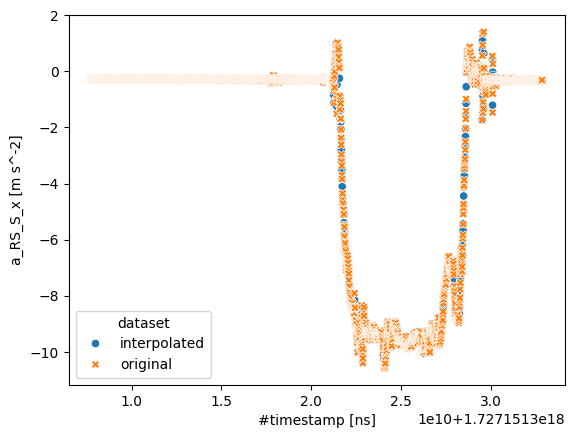

In [75]:
sns.scatterplot(x='#timestamp [ns]', y='a_RS_S_x [m s^-2]', data=concatenated, hue='dataset', style='dataset')

<Axes: xlabel='#timestamp [ns]', ylabel='a_RS_S_y [m s^-2]'>

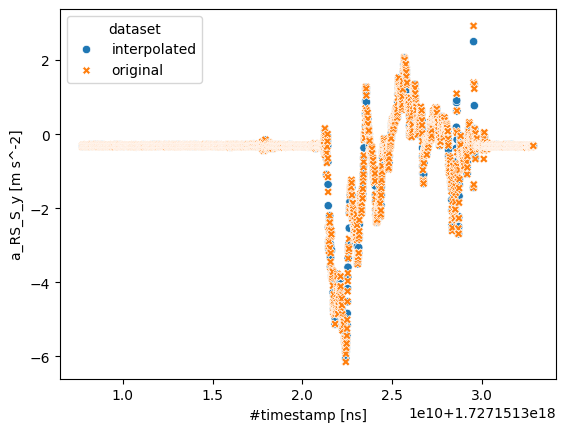

In [76]:
sns.scatterplot(x='#timestamp [ns]', y='a_RS_S_y [m s^-2]', data=concatenated, hue='dataset', style='dataset')

<Axes: xlabel='#timestamp [ns]', ylabel='a_RS_S_z [m s^-2]'>

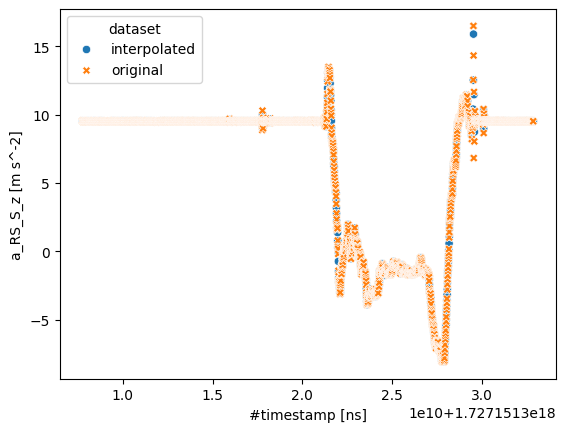

In [77]:
sns.scatterplot(x='#timestamp [ns]', y='a_RS_S_z [m s^-2]', data=concatenated, hue='dataset', style='dataset')